### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/telco_churn_data.csv')

In [3]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [5]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [6]:
df['Customer Satisfaction'] = df['Customer Satisfaction'].fillna(0)

In [10]:
df_adjusted = df.copy()
df_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [ ]:
#replace string values with integer
#df_adjusted['Offer'].unique()
#df_adjusted['Phone Service'].unique()
#df_adjusted['Multiple Lines'].unique()
#df_adjusted['Internet Service'].unique()
#df_adjusted['Internet Type'].unique()
#df_adjusted['Online Security'].unique()
#df_adjusted['Online Backup'].unique()
#df_adjusted['Device Protection Plan'].unique()
#df_adjusted['Premium Tech Support'].unique()
#df_adjusted['Streaming TV'].unique()
#df_adjusted['Streaming Movies'].unique()
#df_adjusted['Streaming Music'].unique()
#df_adjusted['Unlimited Data'].unique()
#df_adjusted['Contract'].unique()
#df_adjusted['Paperless Billing'].unique()
#df_adjusted['Payment Method'].unique()
#df_adjusted['Gender'].unique()
#df_adjusted['Married'].unique()

In [11]:
#replace offer column values
df_adjusted['Offer'].replace({'None':'1','Offer A':'2','Offer B':'3','Offer C':'4','Offer D':'5','Offer E':'6'},inplace=True)

In [12]:
#replace Phone Service column values
df_adjusted['Phone Service'].replace({'No':'0','Yes':'1'},inplace=True)

In [13]:
#replace Multiple Lines column values
df_adjusted['Multiple Lines'].replace({'No':'0','Yes':'1'},inplace=True)

In [14]:
#replace Internet Service column values
df_adjusted['Internet Service'].replace({'No':'0','Yes':'1'},inplace=True)

In [15]:
#replace Internet Type column values
df_adjusted['Internet Type'].replace({'None':'0','Cable':'1','DSL':'2','Fiber Optic':'3'},inplace=True)

In [16]:
#replace Online Security column values
df_adjusted['Online Security'].replace({'No':'0','Yes':'1'},inplace=True)

In [17]:
#replace Online Backup column values
df_adjusted['Online Backup'].replace({'No':'0','Yes':'1'},inplace=True)

In [18]:
#replace Device Protection Plan column values
df_adjusted['Device Protection Plan'].replace({'No':'0','Yes':'1'},inplace=True)

In [19]:
#replace Premium Tech Support column values
df_adjusted['Premium Tech Support'].replace({'No':'0','Yes':'1'},inplace=True)

In [20]:
#replace Streaming TV column values
df_adjusted['Streaming TV'].replace({'No':'0','Yes':'1'},inplace=True)

In [21]:
#replace Streaming Movies column values
df_adjusted['Streaming Movies'].replace({'No':'0','Yes':'1'},inplace=True)

In [22]:
#replace Streaming Music column values
df_adjusted['Streaming Music'].replace({'No':'0','Yes':'1'},inplace=True)

In [23]:
#replace Unlimited Data column values
df_adjusted['Unlimited Data'].replace({'No':'0','Yes':'1'},inplace=True)

In [24]:
#replace Contract column values
df_adjusted['Contract'].replace({'Month-to-Month':'0','One Year':'1','Two Year':'2'},inplace=True)

In [25]:
#replace Paperless Billing column values
df_adjusted['Paperless Billing'].replace({'No':'0','Yes':'1'},inplace=True)

In [26]:
#replace Payment Method column values
df_adjusted['Payment Method'].replace({'Bank Withdrawal':'0','Credit Card':'1','Mailed Check':'2'},inplace=True)

In [27]:
#replace Gender column values
df_adjusted['Gender'].replace({'Male':'0','Female':'1'},inplace=True)

In [28]:
#replace Married column values
df_adjusted['Married'].replace({'No':'0','Yes':'1'},inplace=True)

In [29]:
colstodrop = ['Zip Code','Referred a Friend','Under 30', 'Senior Citizen', 'Dependents','Churn Category','Churn Reason', 'City','Referred a Friend']

df_adjusted = df_adjusted.drop(colstodrop, axis=1)


In [30]:
df_adjusted['Total Charges'] = df_adjusted['Total Regular Charges'] + df_adjusted['Total Extra Data Charges'] + df_adjusted['Total Long Distance Charges'] - df_adjusted['Total Refunds'] 

In [31]:
#convert string to Int
df_adjusted['Phone Service'] = df_adjusted['Phone Service'].astype(int)
df_adjusted['Multiple Lines'] = df_adjusted['Multiple Lines'].astype(int)
df_adjusted['Internet Service'] = df_adjusted['Internet Service'].astype(int)
df_adjusted['Internet Type'] = df_adjusted['Internet Type'].astype(int)
df_adjusted['Online Security'] = df_adjusted['Online Security'].astype(int)
df_adjusted['Online Backup'] = df_adjusted['Online Backup'].astype(int)
df_adjusted['Device Protection Plan'] = df_adjusted['Device Protection Plan'].astype(int)
df_adjusted['Premium Tech Support'] = df_adjusted['Premium Tech Support'].astype(int)
df_adjusted['Streaming Movies'] = df_adjusted['Streaming Movies'].astype(int)
df_adjusted['Streaming Music'] = df_adjusted['Streaming Music'].astype(int)
df_adjusted['Unlimited Data'] = df_adjusted['Unlimited Data'].astype(int)
df_adjusted['Contract'] = df_adjusted['Contract'].astype(int)
df_adjusted['Paperless Billing'] = df_adjusted['Paperless Billing'].astype(int)
df_adjusted['Payment Method'] = df_adjusted['Payment Method'].astype(int)
df_adjusted['Gender'] = df_adjusted['Gender'].astype(int)
df_adjusted['Married'] = df_adjusted['Married'].astype(int)
df_adjusted['Offer'] = df_adjusted['Offer'].astype(int)
df_adjusted['Streaming TV'] = df_adjusted['Streaming TV'].astype(int)


In [35]:
df_adjusted = df_adjusted.drop('Customer ID', axis=1)

In [36]:
df_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Offer                              7043 non-null   int64  
 3   Phone Service                      7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Multiple Lines                     7043 non-null   int64  
 6   Internet Service                   7043 non-null   int64  
 7   Internet Type                      7043 non-null   int64  
 8   Avg Monthly GB Download            7043 non-null   int64  
 9   Online Security                    7043 non-null   int64  
 10  Online Backup                      7043 non-null   int64  
 11  Device Protection Plan             7043 non-null   int64

In [37]:
#Standardize the columns
X= StandardScaler().fit_transform(df_adjusted)
working_df= pd.DataFrame(data=X, columns=df_adjusted.columns)
working_df

,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,...,Number of Dependents,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction,Total Charges
0,-0.650409,-1.278988,-0.764620,-3.054010,-1.486303,-0.854176,0.525927,1.162480,-0.578169,-0.633933,...,-0.486835,-0.880463,0.742757,2.201392,1.663829,0.872974,2.559635,-0.42944,-0.533642,-1.017020
1,-0.317185,-0.993743,1.970105,0.327438,1.676120,1.170719,0.525927,-0.588824,-0.100773,-0.633933,...,0.551874,-0.872175,0.729456,1.585200,1.663829,0.762236,2.559635,-0.42944,-0.533642,-0.673137
2,-0.650409,-0.586250,1.423160,0.327438,-0.752828,1.170719,0.525927,1.162480,1.713331,-0.633933,...,2.629292,-0.846023,0.708810,1.200630,1.663829,-1.032395,-0.236845,-0.42944,-0.533642,-0.434392
3,-0.317185,-0.301005,0.876215,0.327438,-0.207092,-0.854176,0.525927,1.162480,-0.387210,-0.633933,...,0.551874,-0.915913,0.661033,0.266580,1.663829,0.791822,-0.236845,0.96436,0.830088,0.004998
4,-0.317185,0.187986,0.876215,0.327438,-1.076516,1.170719,0.525927,-0.588824,-0.291731,-0.633933,...,0.551874,-0.901401,0.806071,0.195046,1.663829,-1.358692,-0.236845,-0.42944,0.830088,0.070474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.650409,1.614210,-0.764620,0.327438,-0.012232,-0.854176,-1.901403,-1.464477,-1.007825,-0.633933,...,-0.486835,-0.751682,1.493436,-0.943582,-0.601023,0.765617,-0.935965,-0.42944,-0.533642,-0.082974
7039,-0.317185,-0.341755,0.876215,0.327438,0.847481,1.170719,0.525927,0.286828,0.137925,1.577454,...,1.590583,-0.619600,1.030743,-0.149384,-0.601023,-1.910691,0.462275,-0.42944,-0.533642,-0.155228
7040,0.682487,1.614210,-0.764620,0.327438,0.433808,1.170719,0.525927,-0.588824,1.808810,-0.633933,...,1.590583,-0.663320,1.912256,-1.044760,-0.601023,0.980330,0.462275,-0.42944,2.193818,3.266497
7041,-0.317185,-0.871495,-0.764620,-3.054010,-1.486303,-0.854176,0.525927,0.286828,-0.196252,1.577454,...,1.590583,-0.822138,1.342613,-1.032515,-0.601023,-1.358692,-0.935965,-0.42944,-0.533642,-0.929976


In [38]:
#Apply PCA
#build a scree plot
pca_matrix = ''
pev = ''
pevr = ''
dimensions = ''

pca_matrix = PCA(n_components=len(working_df.columns))
pca_matrix.fit(working_df)

PCA(n_components=38)

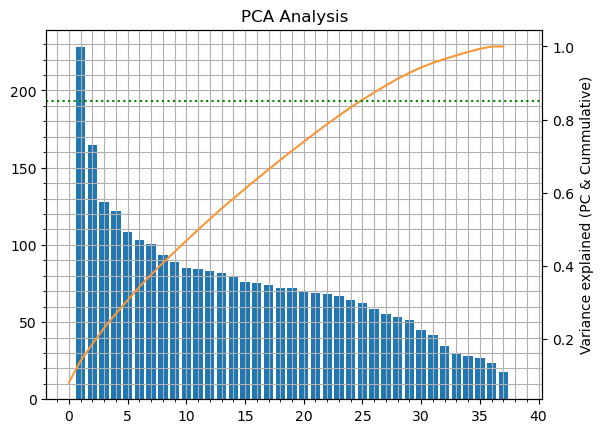

Optimal # of components for 85.0% explained variance: 26


In [39]:
sigma = pca_matrix.singular_values_
cumulative_explained_variance = np.cumsum(sigma)/sigma.sum()

threshold = 0.85
n_components = np.argmax(cumulative_explained_variance >= threshold) + 1


dimensions = list(range(1, len(sigma)+1))
fig, ax1 = plt.subplots()

ax1.bar(x=dimensions, height=sigma)
ax2 = ax1.twinx() 
ax2.plot(cumulative_explained_variance, color='#F79737')

ax2.axhline(y=0.85, color='green', linestyle="dotted")

ax1.grid(which = "both")
ax1.minorticks_on()
plt.title('PCA Analysis')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance explained (PC & Cummulative)')
plt.show()
print(f"Optimal # of components for {threshold * 100}% explained variance: {n_components}")

In [40]:
#Reduce the Dimensionality to two principle components and check the resulting dataframe

pca2 = PCA(n_components=2, random_state = 42)
principal_components2 = pca2.fit_transform(working_df)

df_2PC = pd.DataFrame(data=principal_components2, columns=['PC1', 'PC2'])

df_2PC.info()
df_2PC.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     7043 non-null   float64
 1   PC2     7043 non-null   float64
dtypes: float64(2)
memory usage: 110.2 KB


,PC1,PC2
0,-1.870700,-3.260022
1,-1.406710,-1.648832
2,0.648026,-3.346348
3,1.166091,-2.191613
4,-0.999751,-0.993277


In [41]:
#determine the optimum number of clusters  from the PC-2 dataset
wcss = []
for i in range(1,38):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init='auto')
    kmeans_pca.fit(df_2PC)
    wcss.append(kmeans_pca.inertia_)

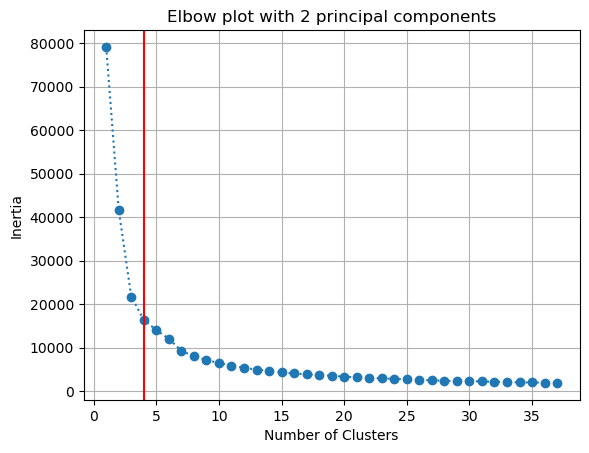

In [42]:
plt.grid(which = "both")
plt.plot(range(1, 38), wcss, marker = 'o', linestyle = 'dotted')
plt.axvline(x=4, color='red', linestyle='solid', label='Optimal K=4')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot with 2 principal components')
plt.show()

In [43]:
#get the kmeans value with 4 clusters and analyze the data
kmeanspp_all = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42,n_init='auto').fit(df_2PC)


In [48]:
#add churn value to dataset
df_2PC['Churn Value'] = df_adjusted['Churn Value']
df_2PC['Cluster'] = kmeanspp_all.labels_
df_adjusted['Cluster'] = kmeanspp_all.labels_

Text(0.5, 1.0, 'Customer data groups based on optimal k-means clusters')

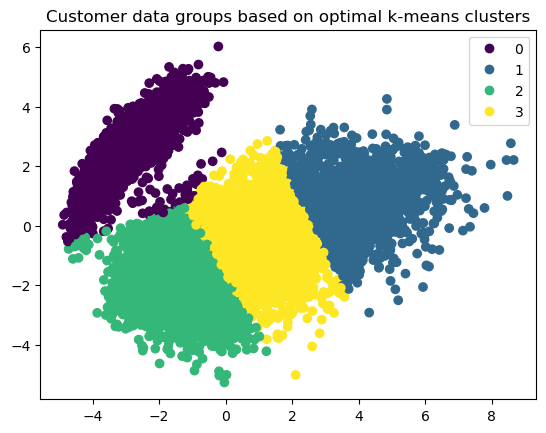

In [49]:
#graph k-means value
graph = plt.scatter(x=df_2PC['PC1'], y=df_2PC['PC2'], c=df_2PC['Cluster'])
plt.legend(*graph.legend_elements())
plt.title('Customer data groups based on optimal k-means clusters')

In [50]:
churn_ds = df_2PC.query('`Churn Value`==1')
churn_ds.shape

(1869, 4)

In [51]:
#Analysis-1: determine the overall churn rate
print(f"The percentage of Churn rate={df_adjusted['Churn Value'].value_counts(normalize=True)[1]}")

The percentage of Churn rate=0.2653698707936959


In [52]:
#Analysis-2: determine the churn rate per cluster
churnpercluster = df_adjusted.groupby('Cluster')[['Churn Value']].value_counts(normalize=True)
churnpercluster = churnpercluster.mul(100).rename('Percent').reset_index()
churnpercluster.sort_values(['Cluster','Churn Value'], ascending=True)

,Cluster,Churn Value,Percent
0,0,0,93.822394
1,0,1,6.177606
2,1,0,90.802213
3,1,1,9.197787
5,2,0,42.184644
4,2,1,57.815356
6,3,0,79.784367
7,3,1,20.215633


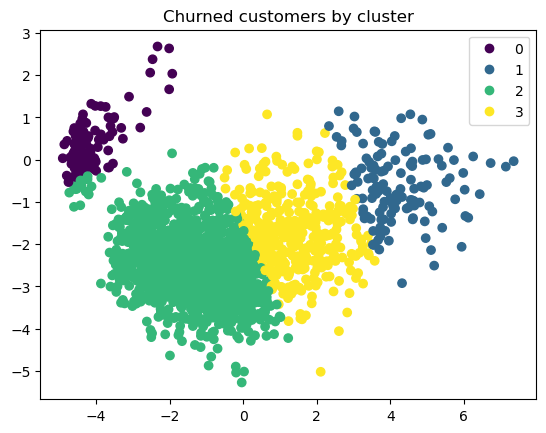

In [58]:
#Analysis-3:show spread of Churn across clusters

graph = plt.scatter(x=churn_ds['PC1'], y=churn_ds['PC2'], c=churn_ds['Cluster'])
plt.legend(*graph.legend_elements())
plt.title("Churned customers by cluster")
plt.show()

<Axes: xlabel='Tenure in Months', ylabel='Count'>

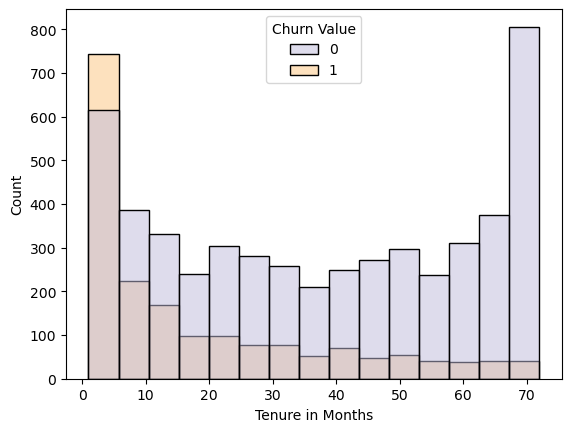

In [59]:
sns.histplot(data=df_adjusted, x='Tenure in Months', hue='Churn Value', palette="PuOr_r")

<Axes: xlabel='Contract', ylabel='count'>

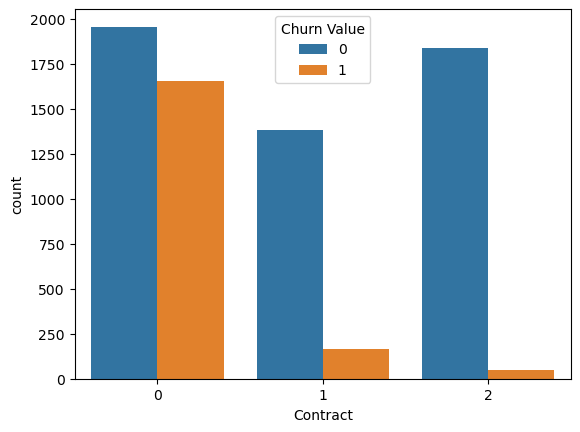

In [60]:
sns.countplot(data=df_adjusted, x='Contract', hue='Churn Value')

<Axes: xlabel='Total Customer Svc Requests', ylabel='count'>

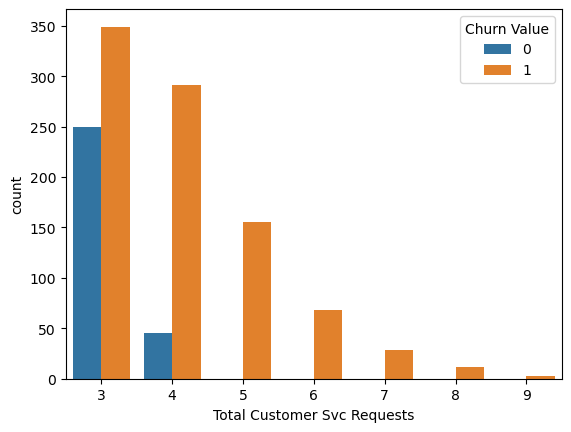

In [61]:

sns.countplot(data=df_adjusted.query('`Total Customer Svc Requests`>=3'), x='Total Customer Svc Requests', hue='Churn Value')


<Axes: xlabel='Premium Tech Support', ylabel='count'>

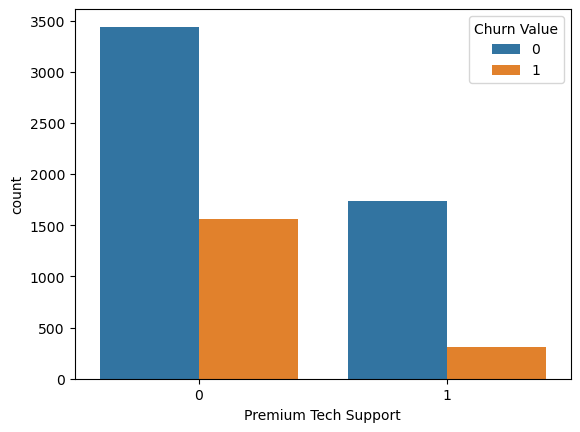

In [62]:
sns.countplot(data=df_adjusted, x='Premium Tech Support', hue='Churn Value')

<Axes: xlabel='Offer', ylabel='count'>

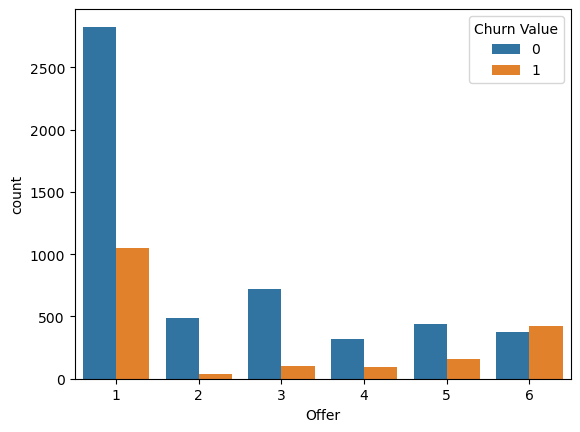

In [67]:
sns.countplot(data=df_adjusted, x='Offer', hue='Churn Value')

Churn Value  Offer
0            1        2826
             3         723
             2         485
             5         441
             6         379
             4         320
1            1        1051
             6         426
             5         161
             3         101
             4          95
             2          35
dtype: int64

# Graveyard analysis

In [ ]:
df_adjusted.groupby('Churn Value')[['Offer']].value_counts(normalize=True)

In [71]:
#get report of some columns and their value counts that are in clusters 2& 3 and that churned
subds = df_adjusted.query('Cluster in(2,3) and `Churn Value`==1')[['Offer','Phone Service','Internet Service','Online Security',
                                             'Online Backup','Device Protection Plan','Premium Tech Support',
                                            'Streaming TV','Contract','Payment Method',
                                            'Streaming Movies','Streaming Music']]

value_counts_report = {}
for column in subds.columns:
    value_counts_report[column] = subds[column].value_counts()
# Display the report
print("Value counts per Object Column: \n")
for column, value_counts in value_counts_report.items():
    print(f"{column}:\n{value_counts}")

Value counts per Object Column: 

Offer:
1    934
6    392
5    152
4     92
3     66
2      4
Name: Offer, dtype: int64
Phone Service:
1    1470
0     170
Name: Phone Service, dtype: int64
Internet Service:
1    1623
0      17
Name: Internet Service, dtype: int64
Online Security:
0    1404
1     236
Name: Online Security, dtype: int64
Online Backup:
0    1218
1     422
Name: Online Backup, dtype: int64
Device Protection Plan:
0    1195
1     445
Name: Device Protection Plan, dtype: int64
Premium Tech Support:
0    1394
1     246
Name: Premium Tech Support, dtype: int64
Streaming TV:
0    945
1    695
Name: Streaming TV, dtype: int64
Contract:
0    1536
1      94
2      10
Name: Contract, dtype: int64
Payment Method:
0    1205
1     322
2     113
Name: Payment Method, dtype: int64
Streaming Movies:
0    942
1    698
Name: Streaming Movies, dtype: int64
Streaming Music:
0    1012
1     628
Name: Streaming Music, dtype: int64


In [63]:
#Get counts grouped by clusters and churned for categorical fields
categorical_flds=['Offer','Phone Service','Internet Service','Online Security',
                                             'Online Backup','Device Protection Plan','Premium Tech Support',
                                            'Streaming TV','Contract','Payment Method',
                                            'Streaming Movies','Streaming Music']

subds = df_adjusted.query('`Churn Value`==1').groupby(['Cluster'])[categorical_flds].sum()
subds

,Offer,Phone Service,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Contract,Payment Method,Streaming Movies,Streaming Music
Cluster,,,,,,,,,,,,
0,316,96,0,0,0,0,0,0,19,98,0,0
1,229,133,133,59,101,100,64,119,129,36,120,100
2,3895,1113,1248,142,244,245,147,422,19,444,418,400
3,725,357,375,94,178,200,99,273,95,104,280,228


In [65]:
#how does each categorical variable impact the churn rate , if the categorical variable value =1
#initalize a dataframe to 
Featurevar_df=pd.DataFrame()



In [66]:
#Analysis-3.1: determine the number pf phone customers per cluster

temp_df=None
data= None

churnpercategorytotal = df_adjusted.query('`Phone Service`==1').count()[0]
churnpercategory =  df_adjusted.query('`Phone Service`==1').groupby('Churn Value')[['Churn Value']].value_counts()
churnpercategory = churnpercategory.rename('total').reset_index()
churnpercategory['percent'] = churnpercategory['total']/churnpercategorytotal

churn_total = churnpercategory.query('`Churn Value`==1')['total'][1]
churn_per = churnpercategory.query('`Churn Value`==1')['percent'][1]
notchurned_total = churnpercategory.query('`Churn Value`==0')['total'][0]
notchurned_per = churnpercategory.query('`Churn Value`==0')['percent'][0]

data= {'feature':'Phone Service','churn_total':[churn_total],'notchurned_total':[notchurned_total],
       'churn_per':[churn_per],
       'notchurned_per':[notchurned_per]}
temp_df = pd.DataFrame(data)

Featurevar_df = pd.concat([Featurevar_df,temp_df], ignore_index=True)
Featurevar_df

,feature,churn_total,notchurned_total,churn_per,notchurned_per
0,Phone Service,1699,4662,0.267096,0.732904


In [ ]:
Featurevar_df.info()

In [ ]:
#Analysis-4: determine the number pf internet customers per cluster
churnpercluster = df_adjusted.groupby('Cluster')[['Internet Service']].value_counts(normalize=True)
churnpercluster = churnpercluster.mul(100).rename('Percent').reset_index()
churnpercluster.sort_values(['Cluster','Internet Service'], ascending=True)

In [ ]:
new_df = df_adjusted.groupby('Cluster')['Churn Value'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
new_df

In [ ]:
df_2PC.info()

In [ ]:
df_2PC.info()

In [ ]:
#draw a histogram for tenure
g= sns.FacetGrid(df_continuous,col='SegmentKmeans')
g.map(sns.histplot,'Tenure in Months')

In [ ]:
#draw a histogram for Age
g= sns.FacetGrid(df_continuous,col='SegmentKmeans')
g.map(sns.histplot,'Age')